In [ ]:
#----GOAL: Analysis on Districts with the most fires for 2012-2022

#Import Dependencies
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd

#read in csv file of Oregon fire data
oregonfiredata_master_df = pd.read_csv("ODF_Fire_Occurrence_Data_2000-2022.csv")

oregonfiredata_master_df

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


In [139]:
#Filter data by Districts, number of fires, and acres burned, and cause for 2012-2022

filteredoregonfiredata_df = oregonfiredata_master_df[["FireYear", "DistrictName", "EstTotalAcres"]]

filteryears = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for2012to2022yearoregonfiredata_df = filteredoregonfiredata_df[filteredoregonfiredata_df["FireYear"].isin(filteryears)]
#for2012to2022yearoregonfiredata_df.dtypes

#Clean the df to drop null values as integers in EstTotalAcres and strings in HumanOrLightning
cleanedoregonfiredata = for2012to2022yearoregonfiredata_df.dropna()
cleanedoregonfiredata = cleanedoregonfiredata[(cleanedoregonfiredata != '').all(axis=1)]
cleanedoregonfiredata


,FireYear,DistrictName,EstTotalAcres
25,2013,Astoria,0.13
27,2014,Forest Grove,0.10
28,2014,North Cascade,5521.00
29,2014,Douglas - DFPA,0.25
30,2014,Klamath-Lake,0.10
...,...,...,...
23485,2021,Walker Range - WRFPA,0.75
23486,2022,Western Lane,0.01
23487,2021,Northeast Oregon,67.43
23488,2022,Northeast Oregon,0.10


In [88]:
#Group the data by year and district name
#groupedfiredatasumacres = cleanedoregonfiredata.groupby(["FireYear", "DistrictName"]).sum()
groupedfiredata = cleanedoregonfiredata.groupby(["FireYear", "DistrictName"]).size().unstack(fill_value=0)

#groupedfiredatasumacres = groupedfiredatasumacres["EstTotalAcres"]
#groupedfiredatasumacres = pd.DataFrame(groupedfiredatasumacres)
#groupedfiredatasumacres
groupedfiredata 


DistrictName,Astoria,Central Oregon,Coos - CFPA,Douglas - DFPA,Forest Grove,Klamath-Lake,North Cascade,Northeast Oregon,South Cascade,Southwest Oregon,Tillamook,Walker Range - WRFPA,West Oregon,Western Lane
FireYear,,,,,,,,,,,,,,
2012,19,102,37,68,27,53,37,50,38,186,10,10,26,26
2013,14,192,69,147,22,92,38,107,44,356,8,27,35,31
2014,19,184,56,123,33,92,54,106,65,286,13,24,36,26
2015,23,140,80,122,43,92,70,85,42,255,15,20,39,48
2016,22,95,87,81,48,70,42,43,30,210,4,17,27,56
2017,21,113,54,100,47,130,45,59,53,350,10,5,27,48
2018,19,124,68,97,43,63,72,78,72,371,6,11,34,51
2019,22,134,72,107,26,64,50,78,79,289,7,15,19,50
2020,17,142,45,86,33,70,46,76,59,279,8,43,25,53


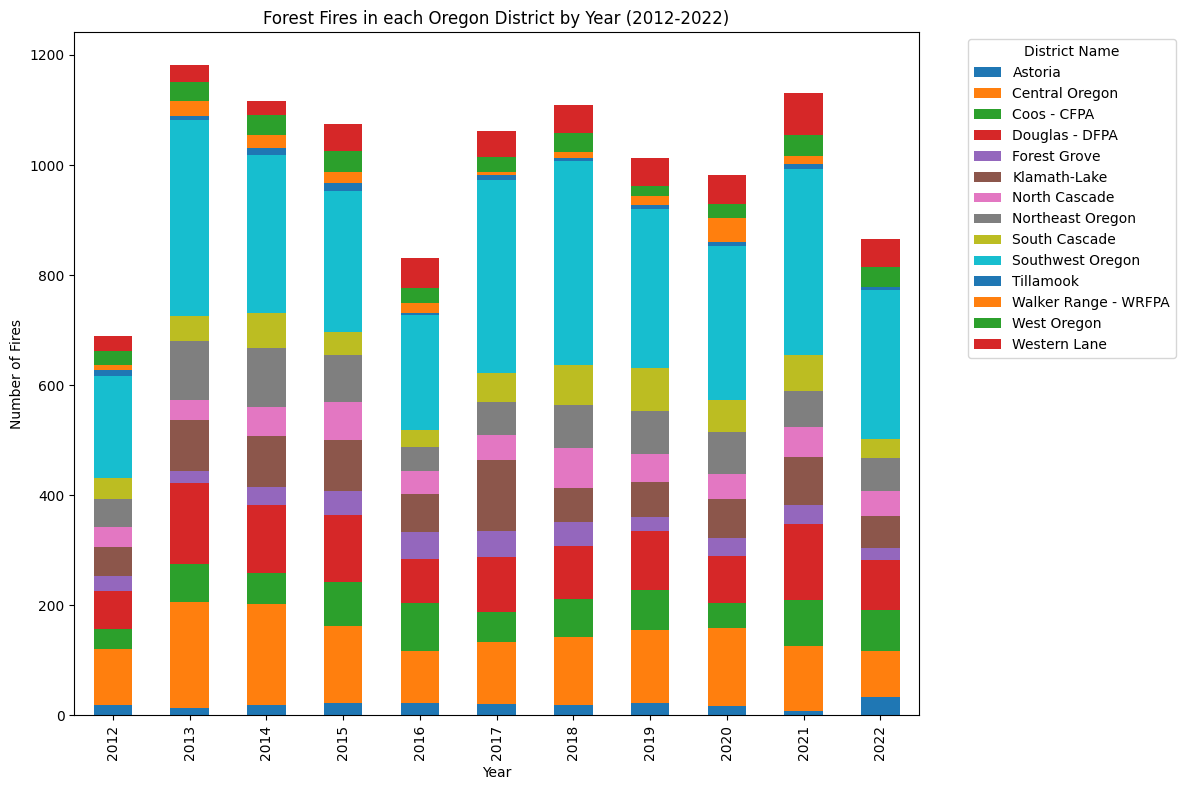

In [117]:
groupedfiredata.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Forest Fires in each Oregon District by Year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [141]:
groupedfiredatasumacres = cleanedoregonfiredata.groupby(["FireYear", "DistrictName"]).sum().unstack(fill_value=0)

#groupedfiredatasumacres=groupedfiredatasumacres.droplevel("EstTotalAcres")
groupedfiredatasumacres.columns = groupedfiredatasumacres.columns.droplevel(0)
groupedfiredatasumacres

DistrictName,Astoria,Central Oregon,Coos - CFPA,Douglas - DFPA,Forest Grove,Klamath-Lake,North Cascade,Northeast Oregon,South Cascade,Southwest Oregon,Tillamook,Walker Range - WRFPA,West Oregon,Western Lane
FireYear,,,,,,,,,,,,,,
2012,9.33,29489.41,75.66,28.63,37.44,93201.45,19.01,73863.28,49.27,24016.65,1.77,0.70,11.83,8.49
2013,2.11,27435.52,121.49,49959.49,22.75,406.22,211.57,1816.60,67.00,47656.91,3.58,332.98,134.64,136.57
2014,454.58,155379.18,828.75,120.04,235.11,39330.57,5970.27,43360.65,48.87,40487.79,0.84,5.60,100.34,820.52
2015,27.31,112591.52,104.25,28682.14,121.65,27.64,141.70,243491.19,89.12,354.20,3.94,0.75,266.55,223.52
2016,2.08,2602.75,63.62,177.88,58.23,3490.40,15.76,42787.79,21.46,750.55,0.25,2.04,265.94,260.61
2017,41.31,122708.74,190655.98,16918.04,136.88,55253.87,49475.65,1024.09,16496.21,40365.61,0.69,0.55,203.85,114.18
2018,35.80,71620.18,175777.85,330.12,89.36,59006.55,81.22,5332.79,11620.50,137523.69,0.72,3.29,58.62,56.26
2019,5.93,243.60,23.93,13456.13,40.64,1590.27,205.58,586.30,165.69,776.76,2.07,2.07,127.59,20.76
2020,2.85,27680.38,367.00,130696.06,16.87,69825.48,537802.16,17300.72,173433.25,189423.77,311.26,5.68,2171.35,361.62


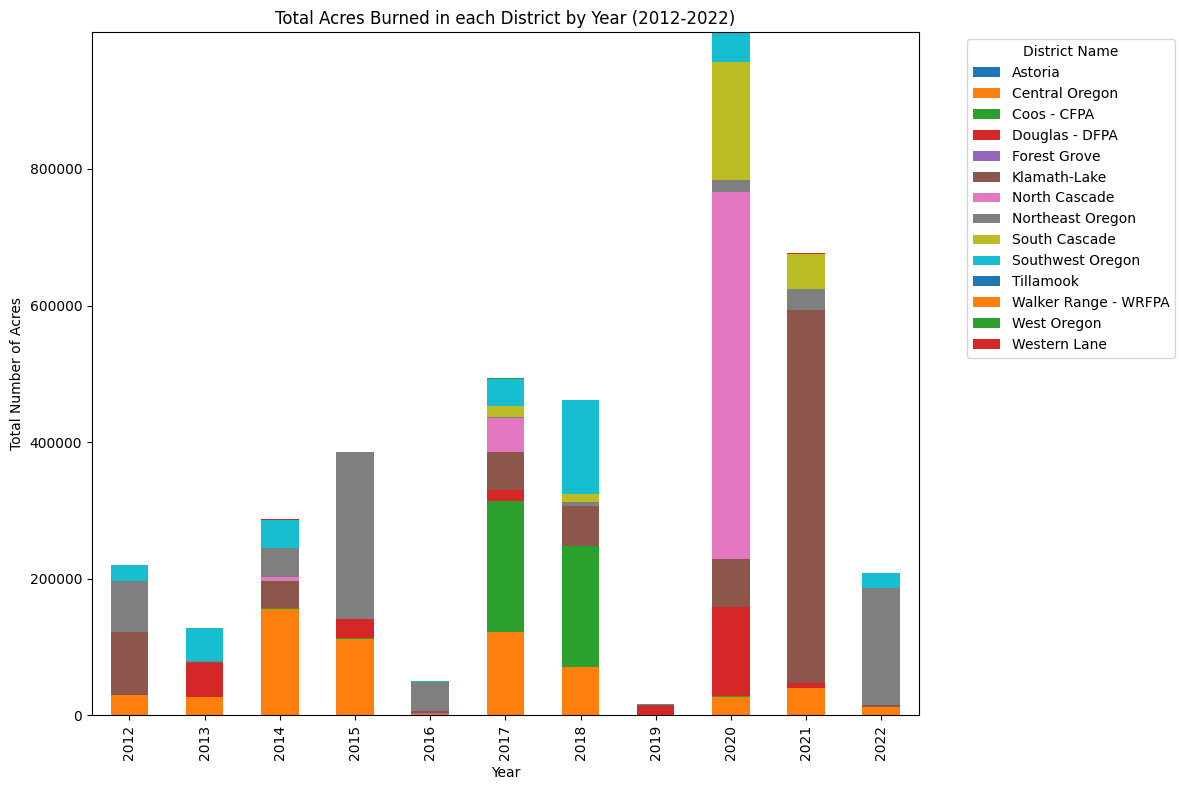

In [151]:
groupedfiredatasumacres.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Acres Burned in each District by Year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Acres')
plt.ylim(0, 999999)
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

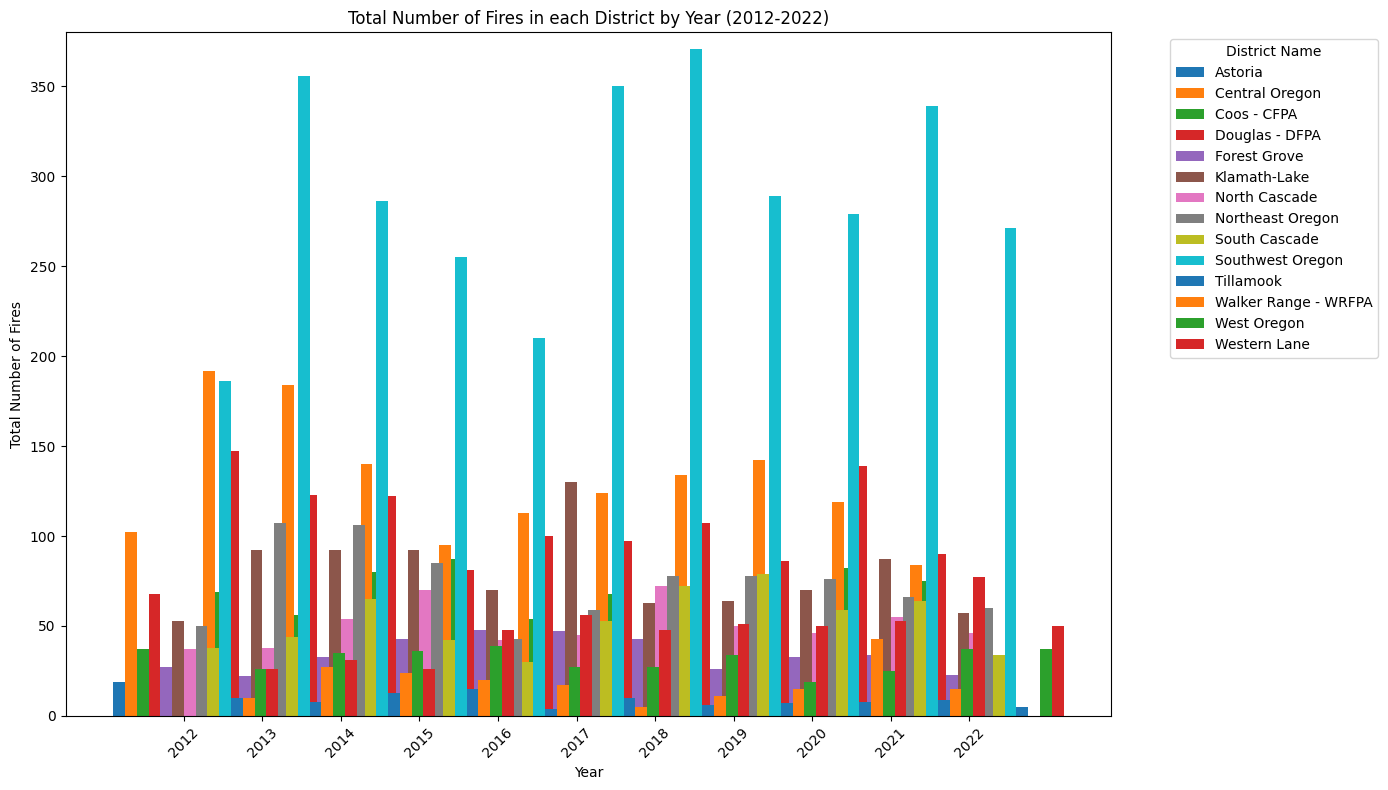

In [257]:
#grouped bar chart might work better
years = groupedfiredata.index
districts = groupedfiredata.columns
bar_width = 0.15

#created array for individual causes
x_positions = [years + i * bar_width for i in range(len(districts))]

#plotting each cause as seperate bar
plt.figure(figsize=(14, 8))
for i, districts in enumerate(districts):
    plt.bar(x_positions[i], groupedfiredata[districts], width=bar_width, label=districts)

#lets try this againplt.title('Forest Fire Causes by Year (2000-2022)')
plt.title('Total Number of Fires in each District by Year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Fires')
plt.ylim(0, 380)
plt.xticks(years + bar_width * (len(districts) - 1) / 2, years, rotation=45)  # Center x-ticks under clusters
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

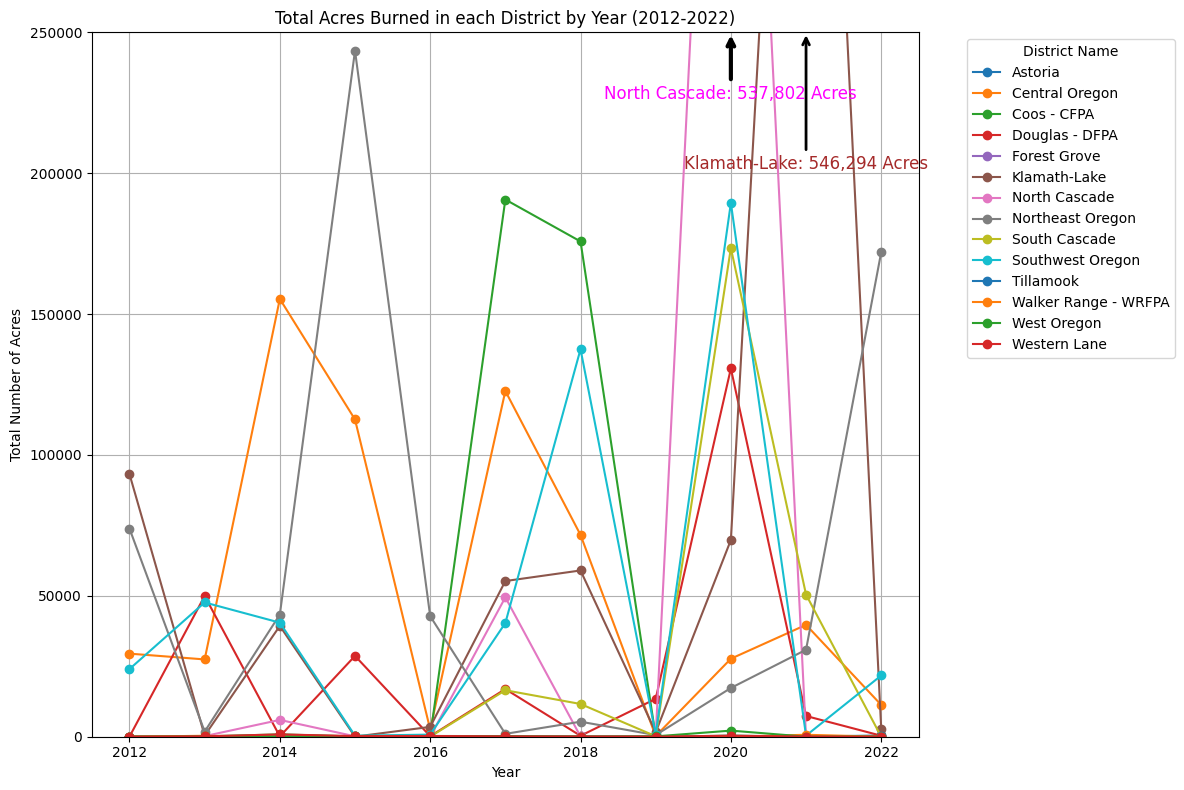

In [245]:
#Create Line Graph for data

plt.figure(figsize=(12, 8))

for district in groupedfiredatasumacres.columns:
    plt.plot(groupedfiredatasumacres.index, groupedfiredatasumacres[district], marker='o', label=district)
plt.title('Total Acres Burned in each District by Year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Acres')
plt.ylim(0, 250000)
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.annotate('North Cascade: 537,802 Acres', xy=(2020, 250000), xytext=(2020, 225000),
              arrowprops=dict(facecolor='black', arrowstyle='->', linewidth = 3),
              horizontalalignment='center',
              verticalalignment='bottom',
              fontsize=12, color='magenta')

plt.annotate('Klamath-Lake: 546,294 Acres', xy=(2021, 250000), xytext=(2021, 200000),
              arrowprops=dict(facecolor='black', arrowstyle='->', linewidth = 2),
              horizontalalignment='center',
              verticalalignment='bottom',
              fontsize=12, color='brown')
plt.tight_layout()
plt.show()

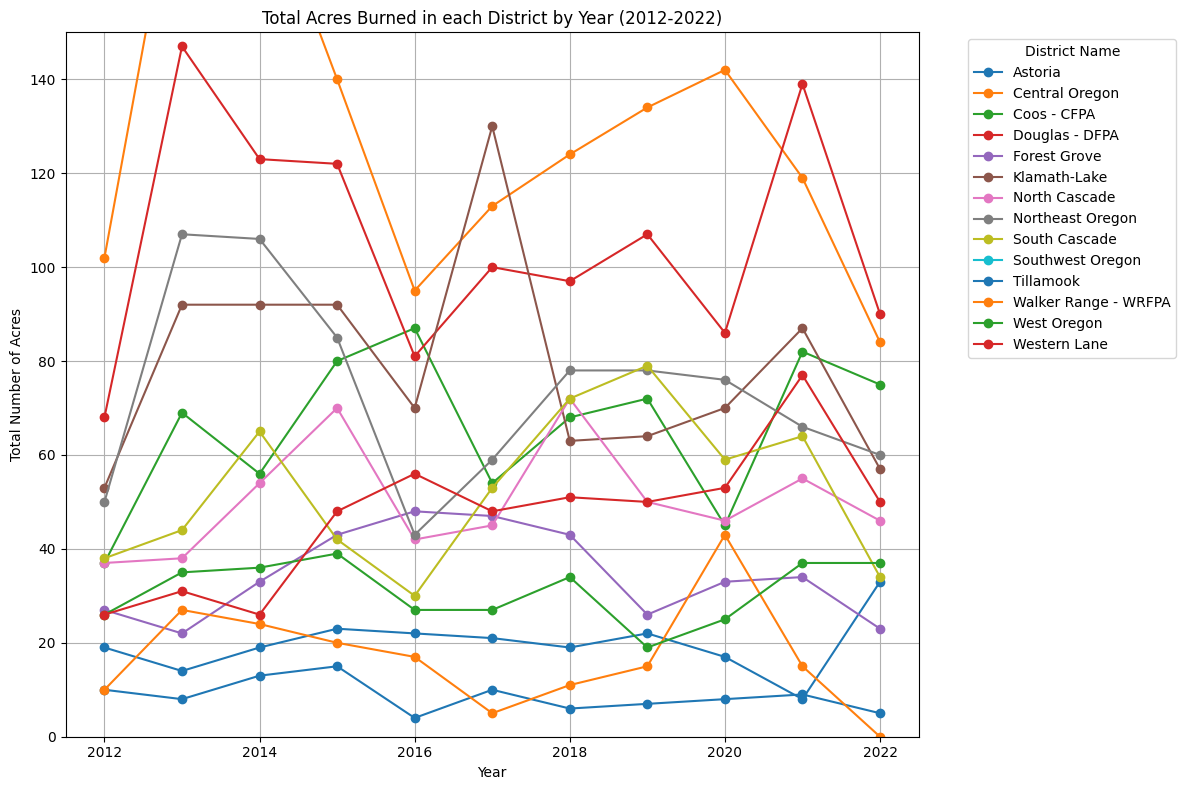

In [253]:
plt.figure(figsize=(12, 8))

for district in groupedfiredata.columns:
    plt.plot(groupedfiredata.index, groupedfiredata[district], marker='o', label=district)
plt.title('Total Acres Burned in each District by Year (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Acres')
plt.ylim(0, 150)
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()